In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
# Defife path to excel file
file_path=r"C:\Users\Neeraj Thakur\Desktop\Projects\Python\Data & Resources\prediction_data.xlsx"

In [3]:
# Define the sheet name to read the data from
sheet_name="vw_churndata"

In [4]:
# Read the data from specified sheet into pandas dataframe
data=pd.read_excel(file_path,sheet_name)

In [5]:
# Display the first few rows of the dataset
data.head()

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,None,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [6]:
# Data Processing
# Drop the columns that are not needed for the prediction
data=data.drop(['customer_id','churn_category','churn_reason'],axis=1)

In [7]:
data.head()

,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,internet_service,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Two Year,No,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned
2,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,Yes,...,Two Year,Yes,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed
3,Male,35,No,Maharashtra,10,12,None,Yes,No,Yes,...,Two Year,Yes,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed
4,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,Yes,...,Two Year,Yes,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed


In [8]:
# List of columns to be label encoded
columns_to_encode=['gender', 'married', 'state','value_deal', 'phone_service', 'multiple_lines',
       'internet_service', 'internet_type', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_data', 'contract',
       'paperless_billing', 'payment_method']

In [9]:
# Encode catagorical variables except target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column]=LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [10]:
# Manually encode the target variable "Customer_status"
data['customer_status']=data['customer_status'].map({'Stayed':0,'Churned':1})

In [11]:
# Split the data into features and target
X=data.drop('customer_status',axis=1)
y=data['customer_status']

In [12]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
# Train Random Forest Model
# Initilize the Random Forest Classifier
rf_model= RandomForestClassifier(n_estimators=100,random_state=42)

In [14]:
# Train the Model
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Make Predictions
y_pred=rf_model.predict(X_test)

In [16]:
# Evaluate Model
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [17]:
# Feature Selection using Feature Importance
importances=rf_model.feature_importances_
indices=np.argsort(importances)[::-1]

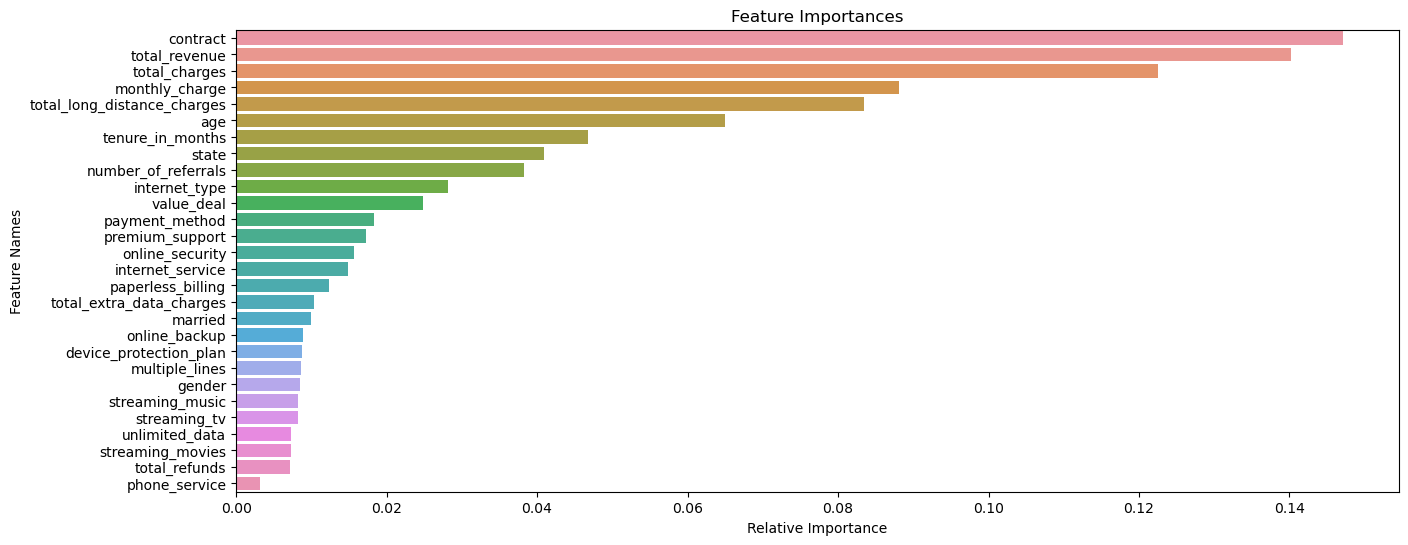

In [18]:
# Plot the figure importances
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [19]:
# Prediction on new dataset

In [20]:
# Define the path to the vw_joiner data excel file
file_path=r"C:\Users\Neeraj Thakur\Desktop\Projects\Python\Data & Resources\prediction_data.xlsx"

In [21]:
# Define the sheet name to read the data from
sheet_name='vw_joindata'

In [22]:
# Read the data from the specified sheet into pandas dataframe
new_data=pd.read_excel(file_path,sheet_name)

In [23]:
# Display the first few rows of the fetched data
new_data.head()

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,Mailed Check,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others
1,12056-WES,Male,27,No,West Bengal,2,20,None,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,None,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
3,12257-ASS,Female,39,No,Assam,9,1,None,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
4,12340-DEL,Female,51,Yes,Delhi,0,10,None,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others


In [24]:
# Retain the original dataframe to preserve unencoded columns
original_data=new_data.copy()

In [25]:
# Retain the customer_id column
customer_ids=new_data['customer_id']

In [26]:
# Drop columns that won't be used for prediction in the encoded dataframe
new_data=new_data.drop(['customer_id','customer_status','churn_category','churn_reason'],axis=1)

In [27]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column]=label_encoders[column].transform(new_data[column])

In [28]:
# Make predictions
new_predictions=rf_model.predict(new_data)

In [29]:
# Add predictions to the original dataframe
original_data['customer_status_predicted']=new_predictions

In [30]:
# Filter the dataframe to include only records predicted as "Churned"
oroginal_data=original_data[original_data['customer_status_predicted']==1]

In [31]:
# Save the results
original_data.to_csv(r"C:\Users\Neeraj Thakur\Desktop\Projects\Python\Data & Resources\prediction_data.csv",index=False)